<a href="https://colab.research.google.com/github/keewonma/website/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Get data from google drive folder
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!cd gdrive
!ls

Mounted at /content/gdrive
gdrive	sample_data


# Basic Linear Regresssion from scratch

In [3]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import os 

#GET DATA
data_folder = os.getcwd() + '/gdrive/My Drive/Colab Notebooks/website/' #get current working directory + folder its in
data = np.genfromtxt(data_folder + 'data/LRData.csv', delimiter=',', skip_header=1) #read in the data
print(data[:5,:5]) # look at the first 5 rows

[[53.42680403 68.77759598]
 [61.53035803 62.5623823 ]
 [47.47563963 71.54663223]
 [59.81320787 87.23092513]
 [55.14218841 78.21151827]]


In [0]:
# MATRIX MATH
X = data[:,0].reshape(-1,1) #get first column (index 0) and convert it into a matrix x (-1 tells numpy to figure out the dimensions)
ones = np.ones([X.shape[0], 1])# create an array of ones only
X = np.concatenate([ones, X],1) #concatenate the ones to X matrix (link X to ones matrix) 
y = data[:, 1].reshape(-1,1) #get second column (index 1) and convert it into a matrix y

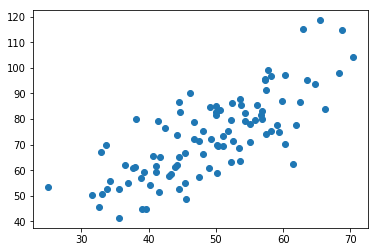

In [5]:
#VISUALIZE
plt.scatter(data[:,0].reshape(-1,1), y)

In [0]:
#SET HYPERPARAMETERS - the parameters that will change your model
alpha = 0.0001
iters = 100
theta = np.array([[1.0, 1.0]]) #theta is the row vector representing the slope and the intercept of the line equation aka the mx

In [0]:
#CREATE A COST FUNCTION
def computeCost(X,y, theta):
  '''
  Estimate how wrong the model is able to estimate the relationship between X and y using squared error function
  input - X,y, theta
  output - squared error 
  inner calculates and returns
        the dot product of X and theta raised to the power two
        divided by 2 times the length of X

  1. find the difference in the predicted values (y_pred) and the original values (y), 
  2 .Sum it up
  3. Average it
  4. Returned value is cost
  '''
  inner = np.power(((X @ theta.T) - y), 2) #@ is matrix multiplication of arrays, * would require conversion from arrays to matrices
  return np.sum(inner)/(2 * len(X))

In [8]:
computeCost(X,y, theta) # trying it on the data

322.6163633088533

In [0]:
#GRADIENT DESCENT - Reducing the Cost function
def gradientDescent(X,y, theta, alpha, iters):
  '''
  Minimize Cost Function by finding the optimum value for the theta parameter so the cost decreases
  input X,y, theta, alpha, iters
  output theta and cost
  '''
  for i in range(iters):
    theta = theta - (alpha/len(X)) * np.sum(X *(X @ theta.T - y), axis=0)
    cost = computeCost(X,y, theta)
  return theta, cost

In [10]:
iters = 1000
g, cost = gradientDescent(X,y, theta, alpha, iters)
print(g)

[[1.04174343 1.46121311]]


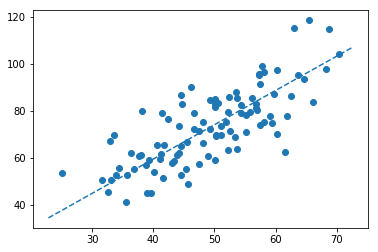

In [11]:
plt.scatter(data[:,0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = g[0][0] + g[0][1] * x_vals
plt.plot(x_vals, y_vals, '--')